In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import stats



In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,6.1101,17.592
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [4]:
%matplotlib inline

In [5]:
def timeit(method):
    def timed(*args,**kw):
        ts=time.time()
        result=method(*args,**kw)
        te=time.time()
        if 'log_time' in kw:
            name = kw.get('log_name',method.__name__.upper())
            kw['log_time'][name]=int((te-ts)*1000)
        else:
            print('%r %2.2f ms' % \
                  (method.__name__,(te-ts)*1000))
        return result
    return timed

In [6]:
df.shape

(96, 2)

In [7]:
X=df.iloc[:,0:-1].values
y=df.iloc[:,-1].values

In [8]:
X

array([[ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6.3589],
       [ 6

In [9]:
y

array([ 9.1302 , 13.662  , 11.854  ,  6.8233 , 11.886  ,  4.3483 ,
       12.     ,  6.5987 ,  3.8166 ,  3.2522 , 15.505  ,  3.1551 ,
        7.2258 ,  0.71618,  3.5129 ,  5.3048 ,  0.56077,  3.6518 ,
        5.3893 ,  3.1386 , 21.767  ,  4.263  ,  5.1875 ,  3.0825 ,
       22.638  , 13.501  ,  7.0467 , 14.692  , 24.147  , -1.22   ,
        5.9966 , 12.134  ,  1.8495 ,  6.5426 ,  4.5623 ,  4.1164 ,
        3.3928 , 10.117  ,  5.4974 ,  0.55657,  3.9115 ,  5.3854 ,
        2.4406 ,  6.7318 ,  1.0463 ,  5.1337 ,  1.844  ,  8.0043 ,
        1.0179 ,  6.7504 ,  1.8396 ,  4.2885 ,  4.9981 ,  1.4233 ,
       -1.4211 ,  2.4756 ,  4.6042 ,  3.9624 ,  5.4141 ,  5.1694 ,
       -0.74279, 17.929  , 12.054  , 17.054  ,  4.8852 ,  5.7442 ,
        7.7754 ,  1.0173 , 20.992  ,  6.6799 ,  4.0259 ,  1.2784 ,
        3.3411 , -2.6807 ,  0.29678,  3.8845 ,  5.7014 ,  6.7526 ,
        2.0576 ,  0.47953,  0.20421,  0.67861,  7.5435 ,  5.3436 ,
        4.2415 ,  6.7981 ,  0.92695,  0.152  ,  2.8214 ,  1.84

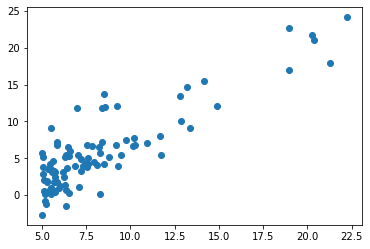

In [10]:
plt.scatter(X,y)

In [11]:
y=y.reshape(-1,1)

In [12]:
def cal_cost(theta,X,y):
    m=len(y)
    predictions=X.dot(theta)
    cost=(1/(2*m)) * np.sum(np.square(predictions-y))
    return cost


In [13]:
@timeit
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    m=len(y)
    cost_history=np.zeros(iterations)
    theta_history=np.zeros((iterations,2))
    for it in range(iterations):
        prediction=np.dot(X, theta)
        theta = theta - (1 /( m * learning_rate*(X.T.dot((prediction-y)))))
        theta_history[it, :]=theta.T
        cost_history[it]=cal_cost(theta,X,y)
    return theta,cost_history,theta_history    



In [14]:
lr=0.05
n_iter=1000
theta=np.random.randn(2, 1)
X_b=np.c_[np.ones((len(X),1)),X]
theta, cost_history, theta_history=gradient_descent(X_b,y,theta,lr,n_iter)
print("Theta0: {:0.3f},\n Theta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE: {:0.3f}".format(cost_history[-1]))

'gradient_descent' 5.73 ms
Theta0: -2.294,
 Theta1:0.305
Final cost/MSE: 24.856


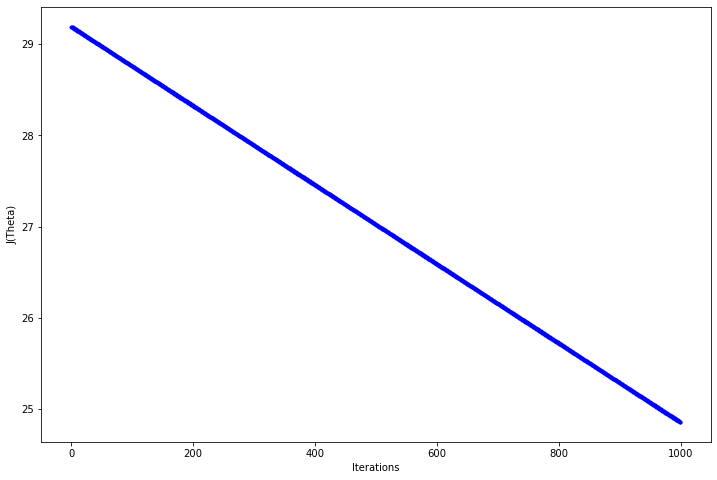

In [15]:
fig,ax=plt.subplots(figsize=(12,8))
ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.')

In [16]:
@timeit
def stochastic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10):
    m=len(y)
    cost_history=np.zeros(iterations)
    for it in range(iterations):
        cost=0.0
        for i in range(m):
            rand_ind=np.random.randint(0,m)
            X_i=X[rand_ind,:].reshape(1,X.shape[1])
            y_i=y[rand_ind].reshape(1,1)
            prediction=np.dot(X_i,theta)
            theta=theta-(1/(m*learning_rate*(X_i.T.dot((prediction-y_i)))))
            cost+=cal_cost(theta,X_i,y_i)
        cost_history[it]  =cost
        
    return theta, cost_history        

In [17]:
lr=0.05
n_iter=1000
theta=np.random.randn(2,1)
X_b=np.c_[np.ones((len(X),1)),X]
theta, cost_history=stochastic_gradient_descent(X_b,y,theta,lr,n_iter)
print("Theta0: {:0.3f},\n Theta1:{:0.3f}".format(theta[0][0], theta[1][0]))
print("Final cost/MSE: {:0.3f}".format(cost_history[-1]))

'stochastic_gradient_descent' 1742.28 ms
Theta0: 278.136,
 Theta1:38.451
Final cost/MSE: 16834825.445


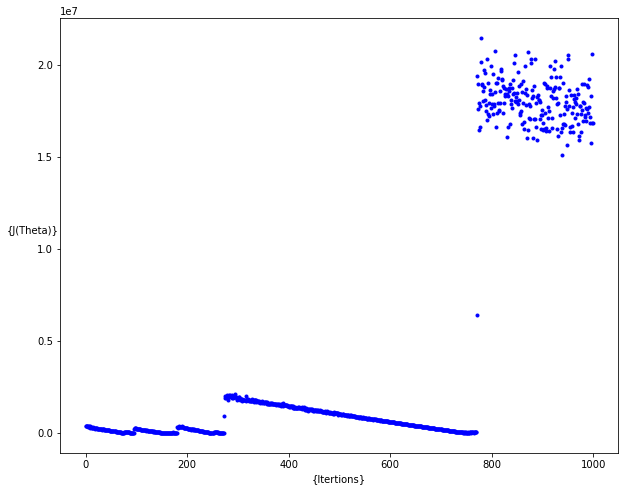

In [18]:
fig, ax=plt.subplots(figsize=(10,8))
ax.set_ylabel("{J(Theta)}",rotation=0)
ax.set_xlabel("{Itertions}")
theta=np.random.randn(2,1)
_=ax.plot(range(n_iter),cost_history,"b.")